In [1]:
import pandas as pd
import numpy as np
import os
train_file_path = os.path.join(os.path.pardir, 'Datasets', 'gene expression cancer RNA-Seq', 'data.csv')
labels_file_path = os.path.join(os.path.pardir, 'Datasets', 'gene expression cancer RNA-Seq', 'labels.csv')
trainDF = pd.read_csv(train_file_path, sep=',')
labelDF = pd.read_csv(labels_file_path, sep=',')

In [2]:
trainDF.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
labelDF.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


### We do not need the sample index

In [4]:
trainDF.drop(['Unnamed: 0'], axis=1, inplace=True)
trainDF.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
labelDF.drop(['Unnamed: 0'], axis=1, inplace=True)
labelDF.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [6]:
labelDF['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

### These are cancer types:
- BRCA: Breast invasive carcinoma
- KIRC: Kidney renal clear cell carcinoma 
- LUAD: Lung adenocarcinoma 
- PRAD: Prostate adenocarcinoma 
- COAD: Colon adenocarcinoma 

### Two questions need to be answered:
    1. Can we use this data to learn a new patient's cancer type?
    2. What are the most relevant genes in diagnosing these cancers?

# 1. Classification

### Train-Test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainDF, labelDF.values.ravel(), test_size=0.2, random_state=0)

### Feature normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train a model

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_prediction = logreg.predict(X_test)

C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
accuracy_score(y_test, y_prediction)

1.0

#### Random forest

In [12]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

In [13]:
accuracy_score(y_test, y_prediction)

1.0

## Results: 
Both models reached an accuracy of 100% which means that there is more than enough data to decide the type of cancer a patient has.

# 2. Most relevant genes

### Feature extraction: 
Use random forest to decide which geanes were the most important in the classification task

In [14]:
random_forest = RandomForestClassifier()
random_forest.fit(trainDF, labelDF.values.ravel())
columnLabels = trainDF.columns
importances = pd.DataFrame({'feature':trainDF.columns, 'importance':random_forest.feature_importances_})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
gene_17904,0.010762
gene_15589,0.009884
gene_17376,0.009405
gene_17905,0.009215
gene_17664,0.008144
gene_5729,0.007102
gene_1750,0.007049
gene_7896,0.006990
gene_6876,0.006926


In [15]:
importances.loc['gene_15633']

importance    0.003686
Name: gene_15633, dtype: float64

In [16]:
# It seems that only less than 2000 genes are relevant in the classification task
print('Importance of the top 500 genes', sum(importances.iloc[:500,0]))
print('Importance of the top 1000 genes', sum(importances.iloc[:1000,0]))
print('Importance of the top 2000 genes', sum(importances.iloc[:2000,0]))

Importance of the top 500 genes 0.903261441127941
Importance of the top 1000 genes 0.9703787724112184
Importance of the top 2000 genes 0.9999999999999976


In [17]:
# identify those genes
dfImportances = pd.DataFrame(np.zeros((trainDF.shape[1])), columns=['Importance'])
thirty = 0
importantGenes = {}
for i in range(100):
    random_forest = RandomForestClassifier()
    random_forest.fit(trainDF, labelDF.values.ravel())
    columnLabels = trainDF.columns
    importances = pd.DataFrame({'feature':trainDF.columns, 'importance':random_forest.feature_importances_})
    dfImportances['Importance'] += importances['importance']    

In [19]:
importances_sorted = dfImportances.sort_values('Importance', ascending=False)
importances_sorted.head(10)

,Importance
18746,0.590279
7964,0.566405
17801,0.517397
5407,0.506084
6611,0.493137
5578,0.474350
6876,0.464904
15589,0.441766
7896,0.441710
14092,0.426458


In [20]:
from sklearn.model_selection import GridSearchCV
def findBestParameters(model, train_X, train_y):
    modelName = model.__class__.__name__
    parameters = {}
    if modelName == 'LogisticRegression':
        parameters = {
            'C': [0.1, 0.5, 1, 5, 10]}
        
    elif modelName == 'RandomForestClassifier':
        parameters = {
            'n_estimators': [10, 50, 100],
            'max_depth': [10, 25, 50, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4]}
        
    clf = GridSearchCV(model, param_grid=parameters, cv=5)
    clf.fit(train_X, train_y)
    #print('Best parameters for', modelName, '\n', clf.best_params_)
    
    if modelName == 'RandomForestClassifier':
        return RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], 
                                      max_depth=clf.best_params_['max_depth'],
                                     max_features=clf.best_params_['max_features'], 
                                      min_samples_leaf=clf.best_params_['min_samples_leaf'])
    elif modelName == 'LogisticRegression':
        return LogisticRegression(C=clf.best_params_['C'])
    
    return np.nan

In [21]:
#topFeatureIndices = importances_sorted.index.values[:1000]
topFeatureIndices = importances_sorted.index.values[:22]
selectedColumns = trainDF.columns[topFeatureIndices]
reducedDF = trainDF[selectedColumns]

In [22]:
reducedDF.shape

(801, 22)

In [23]:
import warnings
warnings.filterwarnings('ignore')# dont show warnings
X_train, X_test, y_train, y_test = train_test_split(reducedDF, labelDF.values.ravel(), test_size=0.2, random_state=0)
allModels = [LogisticRegression(), RandomForestClassifier()]
for i, m in enumerate(allModels):
    m = findBestParameters(m, X_train, y_train)
    m.fit(X_train, y_train)
    allModels[i] = m
    y_prediction = m.predict(X_test)
    print(m.__class__.__name__)
    print('Accuracy:', accuracy_score(y_test, y_prediction))
    print('')

LogisticRegression
Accuracy: 1.0

RandomForestClassifier
Accuracy: 1.0



# Results:
We reached 100% accuracy by only using 22 features (genes), which means that these features have all the data we need to identify the cancer type in a patient. 

In [24]:
print('These genes are:')
print(list(selectedColumns))

These genes are:
['gene_18746', 'gene_7964', 'gene_17801', 'gene_5407', 'gene_6611', 'gene_5578', 'gene_6876', 'gene_15589', 'gene_7896', 'gene_14092', 'gene_9652', 'gene_15898', 'gene_15895', 'gene_8349', 'gene_17904', 'gene_10731', 'gene_6748', 'gene_15896', 'gene_9176', 'gene_2318', 'gene_9175', 'gene_9177']


### Note:
As the experiment is repeated, most of these genes show up in this list, which means that most of them, specially the first few, are important in identification of cancer type.

# Visualize

Reduce dimensions to 2 and then visualize all samples in 2 dimensions to see which cancer types have similar genes and which have different ones

In [25]:
from sklearn import decomposition
pca = decomposition.PCA()
vars_pca = pca.fit_transform(trainDF)
percents = pca.explained_variance_ratio_
print("{:.2f}% of the information can be summarized in 2 dimensions".format(sum(percents[:2])*100))

26.34% of the information can be summarized in 2 dimensions


In [26]:
import matplotlib.pyplot as plt
pca = decomposition.PCA(n_components=2)
X_prime = pca.fit_transform(trainDF)

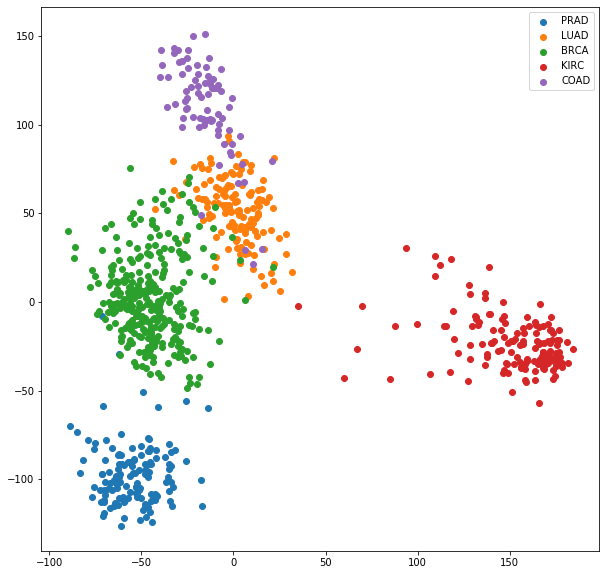

In [27]:
plt.figure(figsize=(10, 10))
dfVisualize = pd.DataFrame(X_prime)
dfVisualize.columns = ['First', 'Second']
dfVisualize['Class'] = labelDF
for class_label in dfVisualize['Class'].unique():
    plt.scatter(x=dfVisualize[dfVisualize.Class == class_label].First, 
                y=dfVisualize[dfVisualize.Class == class_label].Second, 
                label=class_label);
plt.legend()
plt.show()

# Results:
The visualization should be interpreted by a cancer spacialist, but it seems that COAD and LUAD have certain similarities in their gene expression. LUAD and BRCA also show similarities

### Data Source: